In [1]:
import scorecardpy as sc
import pandas as pd
import numpy as np

In [2]:
dat = sc.germancredit()

In [3]:
dat.shape

(1000, 21)

In [4]:
dat.sample(5)

,status_of_existing_checking_account,duration_in_month,credit_history,purpose,credit_amount,savings_account_and_bonds,present_employment_since,installment_rate_in_percentage_of_disposable_income,personal_status_and_sex,other_debtors_or_guarantors,...,property,age_in_years,other_installment_plans,housing,number_of_existing_credits_at_this_bank,job,number_of_people_being_liable_to_provide_maintenance_for,telephone,foreign_worker,creditability
169,0 <= ... < 200 DM,24,critical account/ other credits existing (not ...,business,1935,... < 100 DM,... >= 7 years,4,female : divorced/separated/married,none,...,real estate,31,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,bad
117,... < 0 DM,10,critical account/ other credits existing (not ...,furniture/equipment,2132,unknown/ no savings account,... < 1 year,2,female : divorced/separated/married,co-applicant,...,real estate,27,none,rent,2,skilled employee / official,1,none,no,good
708,0 <= ... < 200 DM,9,existing credits paid back duly till now,radio/television,1206,... < 100 DM,... >= 7 years,4,male : single,none,...,real estate,25,none,own,1,skilled employee / official,1,none,yes,good
871,... >= 200 DM / salary assignments for at leas...,6,critical account/ other credits existing (not ...,car (new),1343,... < 100 DM,... >= 7 years,1,male : single,none,...,real estate,46,none,own,2,skilled employee / official,2,none,no,good
48,no checking account,11,critical account/ other credits existing (not ...,car (new),7228,... < 100 DM,1 <= ... < 4 years,1,male : divorced/separated,none,...,building society savings agreement/ life insur...,39,none,own,2,unskilled - resident,1,none,yes,good


In [5]:
dat = dat.replace('none',np.nan)

In [6]:
result1 = (dat.isnull().sum()/dat.shape[0]).map(lambda x:"{:.2%}".format(x))

In [7]:
print(result1)

status_of_existing_checking_account                          0.00%
duration_in_month                                            0.00%
credit_history                                               0.00%
purpose                                                      0.00%
credit_amount                                                0.00%
savings_account_and_bonds                                    0.00%
present_employment_since                                     0.00%
installment_rate_in_percentage_of_disposable_income          0.00%
personal_status_and_sex                                      0.00%
other_debtors_or_guarantors                                 90.70%
present_residence_since                                      0.00%
property                                                     0.00%
age_in_years                                                 0.00%
other_installment_plans                                     81.40%
housing                                                      0

In [8]:
dat["other_installment_plans"].value_counts()

other_installment_plans
bank      139
stores     47
Name: count, dtype: int64

In [9]:
dat["other_debtors_or_guarantors"].value_counts()

other_debtors_or_guarantors
guarantor       52
co-applicant    41
Name: count, dtype: int64

In [10]:
dat = dat.drop(columns=["other_debtors_or_guarantors","other_installment_plans","telephone"])

In [11]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                                                    Non-Null Count  Dtype   
---  ------                                                    --------------  -----   
 0   status_of_existing_checking_account                       1000 non-null   category
 1   duration_in_month                                         1000 non-null   int64   
 2   credit_history                                            1000 non-null   category
 3   purpose                                                   1000 non-null   object  
 4   credit_amount                                             1000 non-null   int64   
 5   savings_account_and_bonds                                 1000 non-null   category
 6   present_employment_since                                  1000 non-null   category
 7   installment_rate_in_percentage_of_disposable_income       1000 non-null   int64   
 8   personal_

In [12]:
for c in dat.columns:
    if str(dat[c].dtype) == "category":
        dat[c] = dat[c].astype(str)
    print(c,"：",len(dat[c].unique()))

status_of_existing_checking_account ： 4
duration_in_month ： 33
credit_history ： 5
purpose ： 10
credit_amount ： 921
savings_account_and_bonds ： 5
present_employment_since ： 5
installment_rate_in_percentage_of_disposable_income ： 4
personal_status_and_sex ： 4
present_residence_since ： 4
property ： 4
age_in_years ： 53
housing ： 3
number_of_existing_credits_at_this_bank ： 4
job ： 4
number_of_people_being_liable_to_provide_maintenance_for ： 2
foreign_worker ： 2
creditability ： 2


In [13]:
dat.describe()

,duration_in_month,credit_amount,installment_rate_in_percentage_of_disposable_income,present_residence_since,age_in_years,number_of_existing_credits_at_this_bank,number_of_people_being_liable_to_provide_maintenance_for
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [14]:
dt_s = sc.var_filter(dat,y="creditability",iv_limit=0.02)

[INFO] filtering variables ...


C:\Users\shimi\AppData\Local\Programs\Python\Python311\Lib\site-packages\scorecardpy\condition_fun.py:141: UserWarning: The positive value in "creditability" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))


In [15]:
dat.shape

(1000, 18)

In [16]:
dt_s.shape

(1000, 12)

In [17]:
train,test = sc.split_df(dt=dt_s,y="creditability").values()

In [18]:
train.creditability.value_counts()

creditability
0    490
1    210
Name: count, dtype: int64

In [19]:
test.creditability.value_counts()

import warnings
warnings.filterwarnings("ignore")

In [20]:
bins = sc.woebin(dt_s,y="creditability",method="tree")
bins["installment_rate_in_percentage_of_disposable_income"]

[INFO] creating woe binning ...


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,installment_rate_in_percentage_of_disposable_i...,"[-inf,3.0)",367,0.367,271,96,0.261580,-0.190473,0.012789,0.025569,3.0,False
1,installment_rate_in_percentage_of_disposable_i...,"[3.0,4.0)",157,0.157,112,45,0.286624,-0.064539,0.000645,0.025569,4.0,False
2,installment_rate_in_percentage_of_disposable_i...,"[4.0,inf)",476,0.476,317,159,0.334034,0.157300,0.012135,0.025569,inf,False


In [21]:
bins_df = pd.concat(bins).reset_index().drop(columns="level_0")

In [22]:
print(bins_df)

    level_1                                           variable  \
0         0                                     credit_history   
1         1                                     credit_history   
2         2                                     credit_history   
3         3                                     credit_history   
4         0                                           property   
5         1                                           property   
6         2                                           property   
7         3                                           property   
8         0                status_of_existing_checking_account   
9         1                status_of_existing_checking_account   
10        2                status_of_existing_checking_account   
11        0                                            purpose   
12        1                                            purpose   
13        2                                            purpose   
14        

In [23]:
bins["age_in_years"].info()
bins_df2 = bins["age_in_years"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   variable           5 non-null      object  
 1   bin                5 non-null      category
 2   count              5 non-null      int64   
 3   count_distr        5 non-null      float64 
 4   good               5 non-null      int64   
 5   bad                5 non-null      int64   
 6   badprob            5 non-null      float64 
 7   woe                5 non-null      float64 
 8   bin_iv             5 non-null      float64 
 9   total_iv           5 non-null      float64 
 10  breaks             5 non-null      object  
 11  is_special_values  5 non-null      bool    
dtypes: bool(1), category(1), float64(5), int64(3), object(2)
memory usage: 754.0+ bytes


{'age_in_years': <Figure size 640x480 with 2 Axes>}

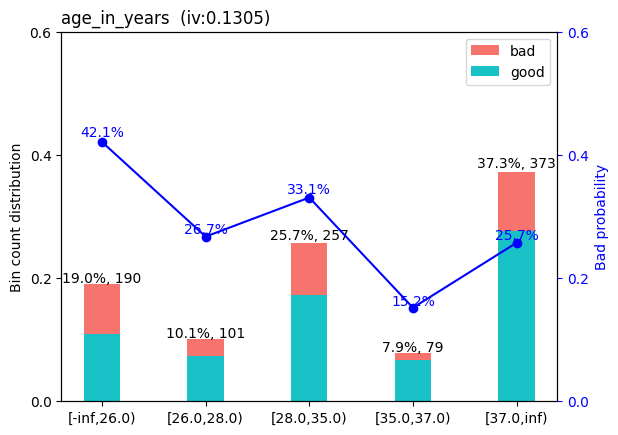

In [24]:
sc.woebin_plot(bins['age_in_years'])

{'credit_amount': <Figure size 640x480 with 2 Axes>}

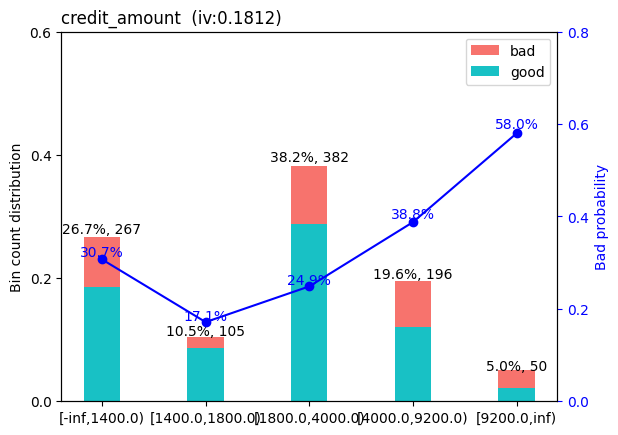

In [25]:
bins["credit_amount"]
sc.woebin_plot(bins["credit_amount"])

In [26]:
bins["credit_amount"]

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,credit_amount,"[-inf,1400.0)",267,0.267,185,82,0.307116,0.033661,0.000305,0.18122,1400.0,False
1,credit_amount,"[1400.0,1800.0)",105,0.105,87,18,0.171429,-0.728239,0.046815,0.18122,1800.0,False
2,credit_amount,"[1800.0,4000.0)",382,0.382,287,95,0.248691,-0.258307,0.024109,0.18122,4000.0,False
3,credit_amount,"[4000.0,9200.0)",196,0.196,120,76,0.387755,0.390539,0.031987,0.18122,9200.0,False
4,credit_amount,"[9200.0,inf)",50,0.050,21,29,0.580000,1.170071,0.078005,0.18122,inf,False


[INFO] creating woe binning ...


{'credit_amount': <Figure size 640x480 with 2 Axes>}

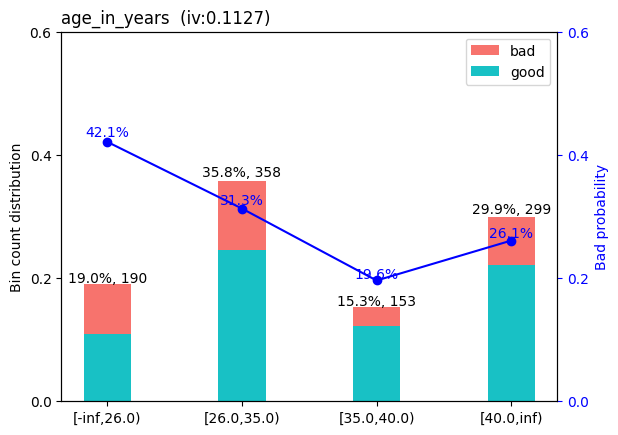

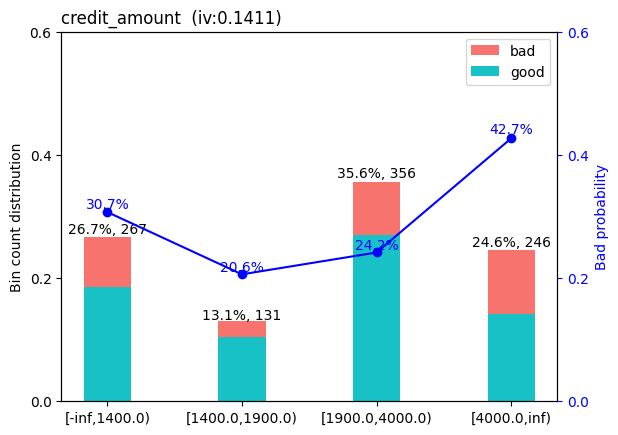

In [27]:
break_adj = {
    'age_in_years':[26,35,40],
    'credit_amount':[1400,1900,4000]
}
bins_adj = sc.woebin(dt_s,y="creditability",breaks_list=break_adj)
sc.woebin_plot(bins_adj["age_in_years"])
sc.woebin_plot(bins_adj["credit_amount"])

[INFO] creating woe binning ...


{'age_in_years': <Figure size 640x480 with 2 Axes>}

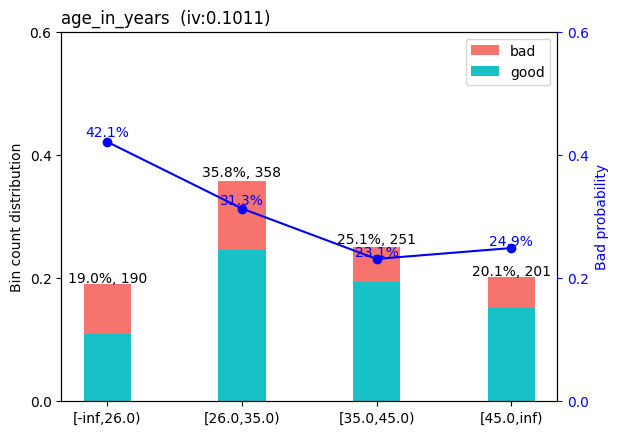

In [28]:
#继续调整分箱
break_adj_a = {
    'age_in_years':[26,35,45],
}
bins_adj_a = sc.woebin(dt_s,y="creditability",breaks_list=break_adj_a)
bins_adj_a_df = pd.concat(bins_adj_a).reset_index().drop(columns="level_0")
bins_adj_a_df[bins_adj_a_df.variable.isin(["age_in_years",'credit_amount'])]
sc.woebin_plot(bins_adj_a["age_in_years"])

In [29]:
#bins_adj_df = pd.concat(bins_adj).reset_index().drop(columns="level_0")

In [30]:
#bins_adj_df[bins_adj_df.variable.isin(["age_in_years",'credit_amount'])]

In [31]:
#sc.woebin_plot(bins_adj["age_in_years"])

In [32]:
#sc.woebin_plot(bins_adj['credit_amount'])

In [33]:
dt_s_train = sc.var_filter(train,y="creditability",iv_limit=0.02)
dt_s_test = sc.var_filter(test,y="creditability",iv_limit=0.02)
bins_train = sc.woebin(dt_s_train,y="creditability",method="chimerge")
bins_test = sc.woebin(dt_s_test,y="creditability",method="chimerge")

[INFO] filtering variables ...
[INFO] filtering variables ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...


[INFO] creating woe binning ...
[INFO] creating woe binning ...


{'age_in_years': <Figure size 640x480 with 2 Axes>}

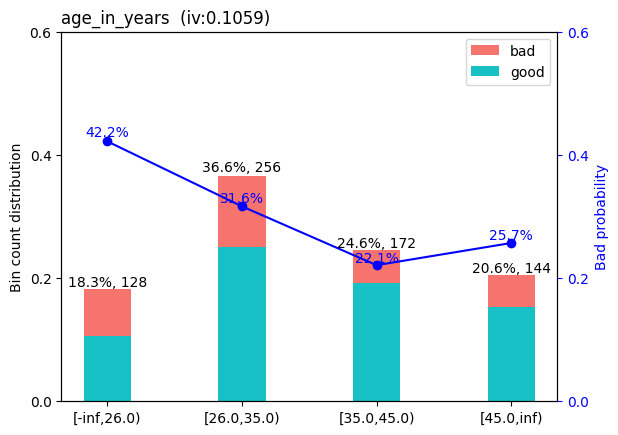

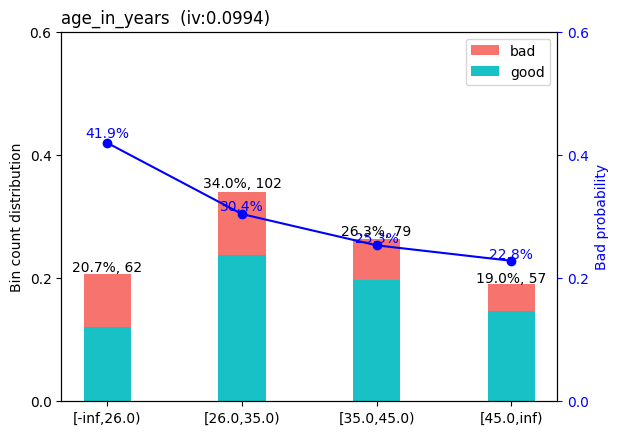

In [34]:
bins_adj_train = sc.woebin(dt_s_train,y="creditability",breaks_list=break_adj_a) #调整后数据
bins_adj_test = sc.woebin(dt_s_test,y="creditability",breaks_list=break_adj_a) #调整后数据
bins_adj_df_train = pd.concat(bins_adj_train).reset_index().drop(columns="level_0")
bins_adj_df_test = pd.concat(bins_adj_test).reset_index().drop(columns="level_0")
bins_adj_df_train[bins_adj_df_train.variable.isin(["age_in_years"])]
bins_adj_df_test[bins_adj_df_test.variable.isin(["age_in_years"])]
sc.woebin_plot(bins_adj_train["age_in_years"])
sc.woebin_plot(bins_adj_test["age_in_years"])
#看下图，训练集和测试集的趋势基本一致

In [35]:
train_woe = sc.woebin_ply(train,bins_adj_a)

[INFO] converting into woe values ...


In [36]:
test_woe = sc.woebin_ply(test,bins_adj_a)

[INFO] converting into woe values ...


In [37]:
train_woe.sample(5)

,creditability,credit_history_woe,property_woe,status_of_existing_checking_account_woe,purpose_woe,credit_amount_woe,savings_account_and_bonds_woe,installment_rate_in_percentage_of_disposable_income_woe,duration_in_month_woe,housing_woe,age_in_years_woe,present_employment_since_woe
769,0,-0.733741,-0.461035,-1.176263,-0.410063,-0.728239,0.271358,-0.190473,-0.346625,-0.194156,-0.257959,-0.235566
270,0,0.088319,0.028573,-1.176263,0.279920,-0.258307,-0.762140,0.157300,0.108688,-0.194156,0.060465,-0.394415
518,0,0.088319,0.028573,0.614204,0.279920,0.033661,0.139552,-0.064539,-1.312186,-0.194156,-0.354949,-0.235566
82,0,0.088319,0.028573,-1.176263,0.279920,-0.728239,0.139552,-0.064539,0.108688,0.404445,0.528844,0.032103
397,0,-0.733741,0.028573,0.614204,0.279920,-0.258307,0.271358,-0.064539,0.524524,-0.194156,-0.257959,0.032103


In [38]:
#进行逻辑回归

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
y_train = train_woe.loc[:,"creditability"]
X_train = train_woe.loc[:,train_woe.columns!="creditability"] #y轴是good，x轴是bad

In [41]:
y_test = test_woe.loc[:,"creditability"]
X_test = test_woe.loc[:,test_woe.columns!="creditability"]

In [42]:
lr = LogisticRegression(penalty='l1',C=0.9,solver='saga',n_jobs=-1)
lr.fit(X_train,y_train)  #penalty是正则化项的类型，L1是lasso，L2是Ridge，防止过拟合。
#C：正则化强度的逆。较高的值表示较强的正则化（较少的复杂度）
#solver优化算法的类型。可以选择的算法有'lbfgs'、'sag'、'saga'和'newton-cg'等。
#不同的算法在速度和稳定性上略有差异。
#n_jobs控制模型的训练速度

LogisticRegression(C=0.9, n_jobs=-1, penalty='l1', solver='saga')

In [43]:
LogisticRegression(C=0.9, n_jobs=-1, penalty='l1', solver='saga')

LogisticRegression(C=0.9, n_jobs=-1, penalty='l1', solver='saga')

In [44]:
lr.coef_

array([[0.63645404, 0.27667618, 0.76238602, 1.03963184, 0.8270508 ,
        0.53522651, 1.72778868, 0.55877058, 0.44459763, 0.71114746,
        0.27872011]])

In [45]:
lr.intercept_

array([-0.8278024])

In [46]:
train_woe.corr() #基本没有多重共线性

,creditability,credit_history_woe,property_woe,status_of_existing_checking_account_woe,purpose_woe,credit_amount_woe,savings_account_and_bonds_woe,installment_rate_in_percentage_of_disposable_income_woe,duration_in_month_woe,housing_woe,age_in_years_woe,present_employment_since_woe
creditability,1.000000,0.223713,0.138366,0.338655,0.185275,0.185104,0.164454,0.081306,0.216159,0.137929,0.149706,0.120492
credit_history_woe,0.223713,1.000000,0.065964,0.187599,0.048561,0.043051,0.022861,-0.043015,0.096823,0.107723,0.110129,0.114688
property_woe,0.138366,0.065964,1.000000,0.050109,-0.000092,0.202763,-0.012162,0.037289,0.270664,0.385101,-0.072692,-0.026858
status_of_existing_checking_account_woe,0.338655,0.187599,0.050109,1.000000,0.125563,0.094076,0.216077,-0.018167,0.102370,0.135174,0.120226,0.137429
purpose_woe,0.185275,0.048561,-0.000092,0.125563,1.000000,-0.033655,0.079544,-0.040250,-0.044294,-0.020701,0.034625,0.090148
credit_amount_woe,0.185104,0.043051,0.202763,0.094076,-0.033655,1.000000,-0.004798,-0.189162,0.334793,0.034146,-0.026494,0.030330
savings_account_and_bonds_woe,0.164454,0.022861,-0.012162,0.216077,0.079544,-0.004798,1.000000,-0.033542,0.031651,0.047464,0.088552,0.118795
installment_rate_in_percentage_of_disposable_income_woe,0.081306,-0.043015,0.037289,-0.018167,-0.040250,-0.189162,-0.033542,1.000000,0.120352,-0.027946,-0.020900,-0.057782
duration_in_month_woe,0.216159,0.096823,0.270664,0.102370,-0.044294,0.334793,0.031651,0.120352,1.000000,0.082360,0.016884,-0.059279
housing_woe,0.137929,0.107723,0.385101,0.135174,-0.020701,0.034146,0.047464,-0.027946,0.082360,1.000000,0.097411,0.068914


In [71]:
def checkVIF(df):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    name = df.columns
    x = np.matrix(df)
    VIF_list = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
    VIF = pd.DataFrame({'feature':name,"VIF":VIF_list})
    max_VIF = max(VIF_list)
    print(max_VIF)
    return VIF
checkVIF(train_woe) #计算训练集的VIF，利用VIF检验，确定是否存在多重共线性，以4或者10为界

1.3161993232843479


,feature,VIF
0,creditability,1.081205
1,credit_history_woe,1.083140
2,property_woe,1.316199
3,status_of_existing_checking_account_woe,1.174639
4,purpose_woe,1.045425
5,credit_amount_woe,1.249287
6,savings_account_and_bonds_woe,1.075255
7,installment_rate_in_percentage_of_disposable_i...,1.094833
8,duration_in_month_woe,1.270067
9,housing_woe,1.235519


In [47]:
train_pred = lr.predict_proba(X_train)[:,1]
test_pred =  lr.predict_proba(X_test)[:,1]

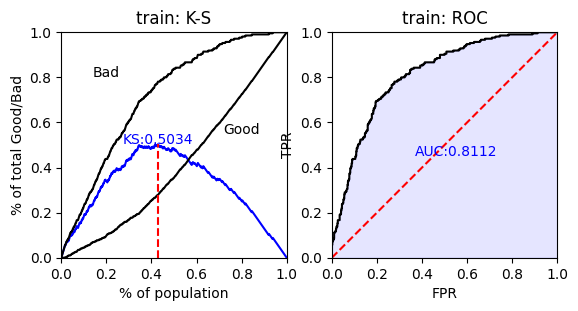

In [48]:
train_perf = sc.perf_eva(y_train,train_pred,title="train")
#KS值越大，模型区分能力越强。模型应该要能区别出违约户和正常户之间的差异，违约户的评级分配应当不同于正常户的评级分配。
#KS值越大，表示模型能够将正、负客户区分开的程度越大。
#通常来讲，KS>0.2即表示模型有较好的预测准确性。

In [ ]:
#ROC(Receiver Operating Characteristic）：接收者操作曲线，在特定刺激条件下，
#以被试在不同判断标准下所得的虚报概率P（y/N）为横坐标，以击中概率P（y/SN）为纵坐标，画得的各点的连线。
#AUC(Area Under Curve)：ROC曲线下面积，
#介于0.1和1之间，AUC大的模型性能优于AUC小的模型性能。

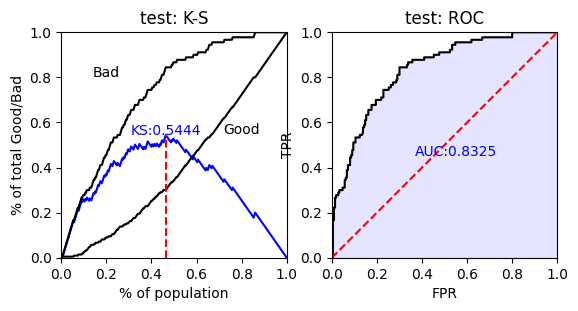

In [49]:
test_perf = sc.perf_eva(y_test,test_pred,title="test")

In [50]:
bins_adj_a_df[bins_adj_a_df["variable"]=="credit_amount"]

,level_1,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
14,0,credit_amount,"[-inf,1400.0)",267,0.267,185,82,0.307116,0.033661,0.000305,0.18122,1400.0,False
15,1,credit_amount,"[1400.0,1800.0)",105,0.105,87,18,0.171429,-0.728239,0.046815,0.18122,1800.0,False
16,2,credit_amount,"[1800.0,4000.0)",382,0.382,287,95,0.248691,-0.258307,0.024109,0.18122,4000.0,False
17,3,credit_amount,"[4000.0,9200.0)",196,0.196,120,76,0.387755,0.390539,0.031987,0.18122,9200.0,False
18,4,credit_amount,"[9200.0,inf)",50,0.050,21,29,0.580000,1.170071,0.078005,0.18122,inf,False


In [51]:
lr.coef_

array([[0.63645404, 0.27667618, 0.76238602, 1.03963184, 0.8270508 ,
        0.53522651, 1.72778868, 0.55877058, 0.44459763, 0.71114746,
        0.27872011]])

In [52]:
lr.intercept_

array([-0.8278024])

In [53]:
import math

In [54]:
B = 50/math.log(2)
A = 600+B*math.log(1/19)
basepoints=A-B*lr.intercept_[0]
print("A:",A,"B:",B,"basepoints:",basepoints)

A: 387.6036243278207 B: 72.13475204444818 basepoints: 447.31694506500946


In [55]:
-B*0.71112211*0.033661 #[-inf,1400.0)

-1.7266954274684423

In [56]:
-B*0.71112211*(-0.501256) #[1400.0,1900.0)

25.71273709013759

In [72]:
card = sc.scorecard(bins_adj_a,lr,X_train.columns)

In [73]:
card_df = pd.concat(card)

In [74]:
card_df.head()

variable  \
basepoints     0      basepoints   
credit_history 0  credit_history   
               1  credit_history   
               2  credit_history   
               3  credit_history   

                                                                bin  points  
basepoints     0                                                NaN   447.0  
credit_history 0  critical account/ other credits existing (not ...    34.0  
               1                    delay in paying off in the past    -4.0  
               2           existing credits paid back duly till now    -4.0  
               3  all credits at this bank paid back duly%,%no c...   -57.0

In [75]:
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)

In [76]:
train_score.sample(5)

,score
33,539.0
410,404.0
381,375.0
133,453.0
118,429.0


In [77]:
test_score.sample(5)

,score
954,388.0
115,588.0
978,491.0
742,587.0
283,614.0


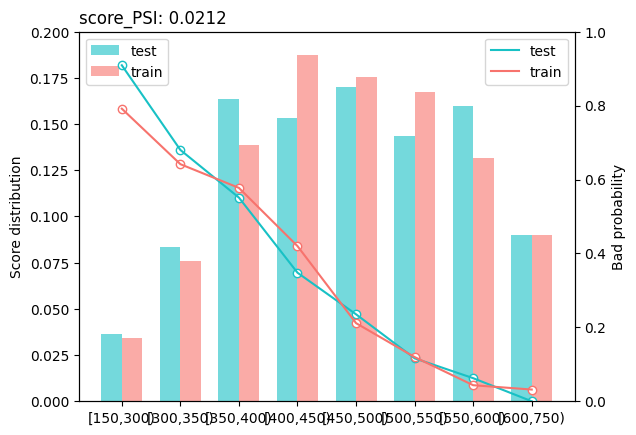

{'psi':   variable       PSI
 0    score  0.021166,
 'pic': {'score': <Figure size 640x480 with 2 Axes>}}

In [78]:
card = sc.scorecard(bins_adj_a,lr,X_train.columns)
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)

sc.perf_psi(
    score = {'train':train_score,'test':test_score},
    label = {'train':y_train,'test':y_test}
)

In [ ]:
#以下是评分的提升度分析（无大用）

In [64]:
train_score = sc.scorecard_ply(train, card, print_step=0)

In [65]:
train_score["y"] = y_train

In [66]:
train_score_sorted = train_score.sort_values(by="score",ascending=True)

In [67]:
train_score_sorted["group"] = [1]*70+[2]*70+[3]*70+[4]*70+[5]*70+[6]*70+[7]*70+[8]*70+[9]*70+[10]*70

In [68]:
group_df = train_score_sorted.groupby(by="group",as_index=False).agg({"score":"count","y":"sum"})

In [69]:
group_df 

,group,score,y
0,1,70,49
1,2,70,42
2,3,70,34
3,4,70,31
4,5,70,17
5,6,70,17
6,7,70,10
7,8,70,6
8,9,70,2
9,10,70,2


In [70]:
group_df["bad_model_rate"] = group_df["y"]/group_df["y"].sum()